In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Función Esfera

**Forma General:**
$$
f(x) = \sum_{i=1}^{d} x_i^2
$$

**Forma Desarrollada para 3 dimensiones:**
$$
z = x^2 + y^2 
$$

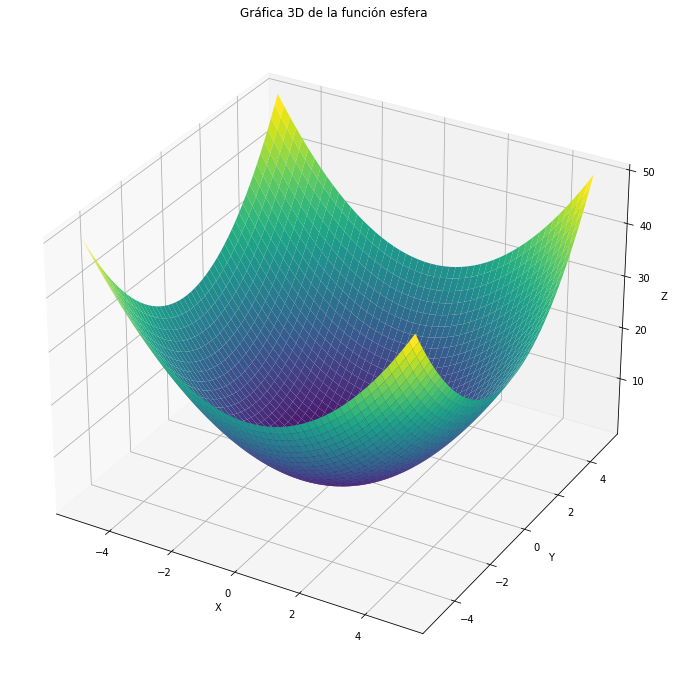

In [37]:
# Función esfera
def sphere_function(x, y):
    return x ** 2 + y ** 2

# Definición de la grilla
grid_size = 400
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
x, y = np.meshgrid(x, y)
# Cálculo de la función esfera
z = sphere_function(x, y)

# Gráfica 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfica 3D de la función esfera')

plt.show()

# Eggholder Function

**Forma General:**
$$
f(x) = -(x_2 + 47) \sin\left(\sqrt{\left| x_2 + \frac{x_1}{2} + 47\right|}\right) - x_1 \sin\left(\sqrt{\left|x_1 - (x_2 + 47)\right|}\right)
$$


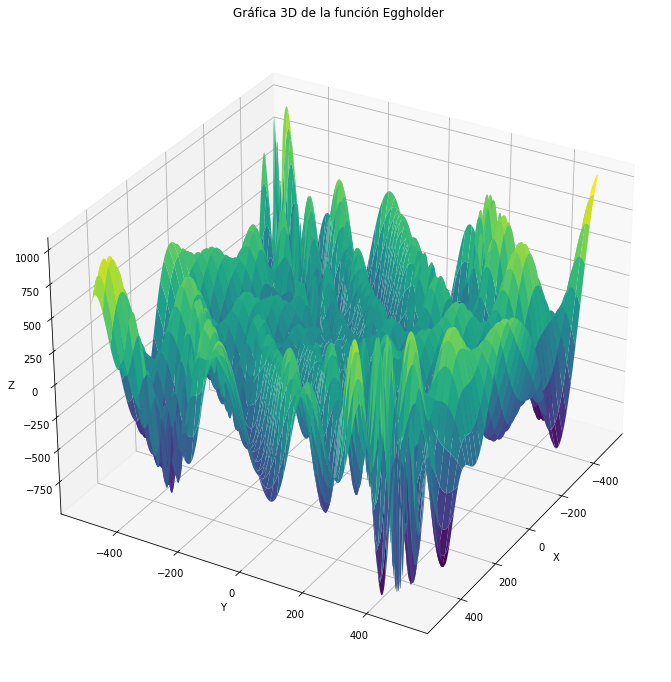

In [38]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

# Gráfica 3D
def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gráfica 3D de la función Eggholder')
    plt.show()

plot_3d()


# Michalewicz Function

**Forma General:**
$$
f(x) = -\sum_{i=1}^{d} \sin(x_i) \sin^{2m}\left(\frac{i x_i^{2}}{\pi}\right)
$$

**Forma Desarrollada para 3 dimensiones:**
$$
Z(x, y) = -\left( \sin(x) \cdot \left( \sin\left(\frac{x^2}{\pi}\right) \right)^{2m} + \sin(y) \cdot \left( \sin\left(\frac{2y^2}{\pi}\right) \right)^{2m} \right)
$$

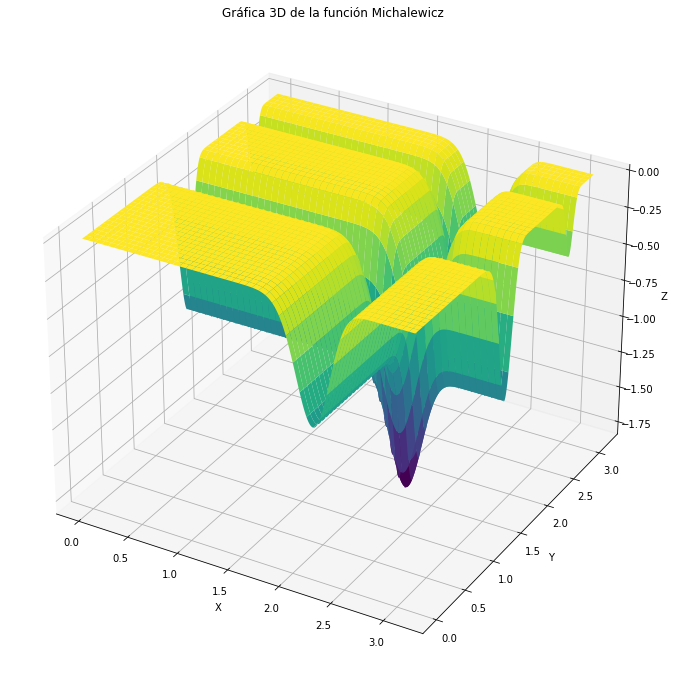

In [39]:
#Función Michalewicz
def michalewicz(x, m=10):
    n = len(x)
    sum = 0
    for i in range(n):
        sum -= np.sin(x[i]) * (np.sin((i+1) * x[i]**2 / np.pi))**(2 * m)
    return sum

# Definición de la grilla
x = np.linspace(0, np.pi, 400)
y = np.linspace(0, np.pi, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Cálculo de la función Michalewicz
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = michalewicz([X[i, j], Y[i, j]])

# Gráfica 3D
def plot_michalewicz():
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gráfica 3D de la función Michalewicz')
    plt.show()

plot_michalewicz()

# Absolute Function

**Forma General:**
$$
f(x)= 
\begin{cases} 
x & \text{si } x \geq 0 \\
-x & \text{si } x < 0 
\end{cases}
$$

**Forma Desarrollada para 3 dimensiones:**
$$
z = |x| + |y|
$$

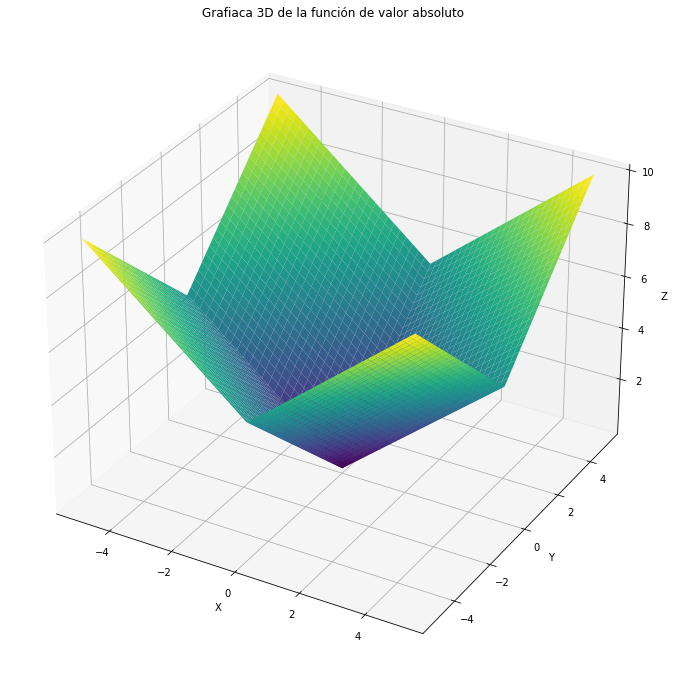

In [40]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Crear un rango de valores para x y y
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
x, y = np.meshgrid(x, y)

# Calcular el valor absoluto de la combinación de x e y
z = abs(x) + abs(y)

# Graficar la superficie
surf = ax.plot_surface(x, y, z, cmap='viridis')

plt.title('Grafiaca 3D de la función de valor absoluto')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Variación

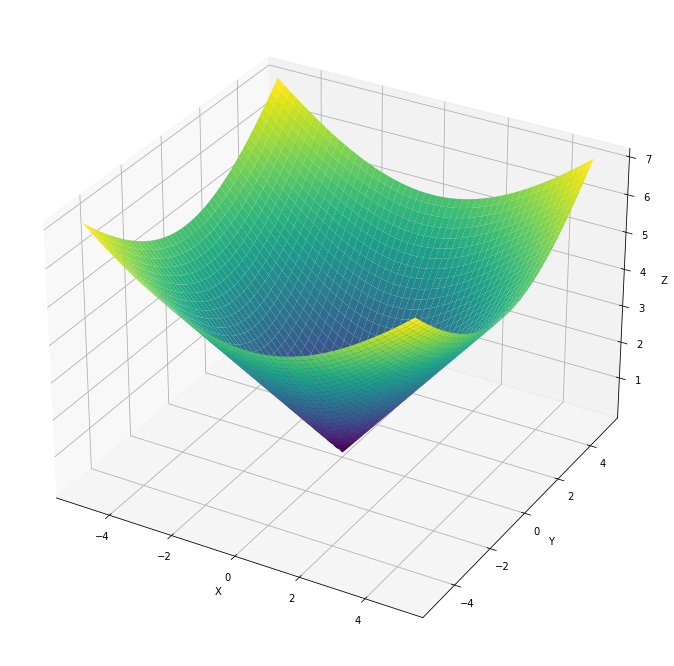

In [41]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Crear un rango de valores para x y y
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
x, y = np.meshgrid(x, y)

# Calcular el valor absoluto de la combinación de x e y, para demostrar cómo se vería en 3D
z = np.sqrt(x**2 + y**2)

# Graficar la superficie
surf = ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Step Function

**Forma General:**
$$
 f(x) = \sum_{i=1}^{n} \left( \lfloor x_i \rfloor \right)
$$

**Forma Desarrollada para 3 dimensiones:**

Primera variante:
$$
z = \lfloor x \rfloor + \lfloor y \rfloor
$$

Segunda variante:
$$
z = \lfloor x^{2} \rfloor + \lfloor y \rfloor
$$

Tercera variante:
$$
z = \lfloor x^{2} \rfloor + \lfloor y^{2} \rfloor
$$

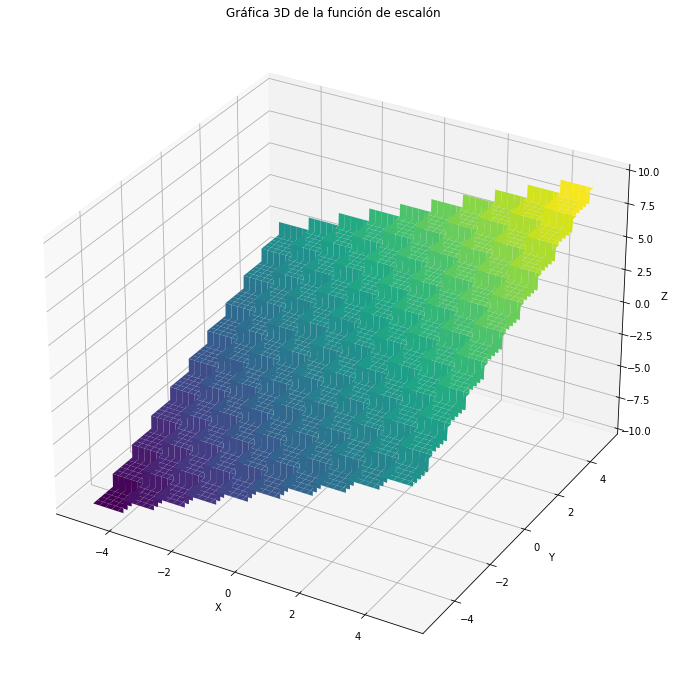

In [42]:
# Función de escalón
def step_function(x, y):
    return np.floor(x) + np.floor(y)

# Definición de la grilla
grid_size = 800
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
X, Y = np.meshgrid(x, y)
# Cálculo de la función de escalón
Z_floor = step_function(X, Y)

# Gráfica 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_floor, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfica 3D de la función de escalón')

plt.show()

## Variaciones de la función


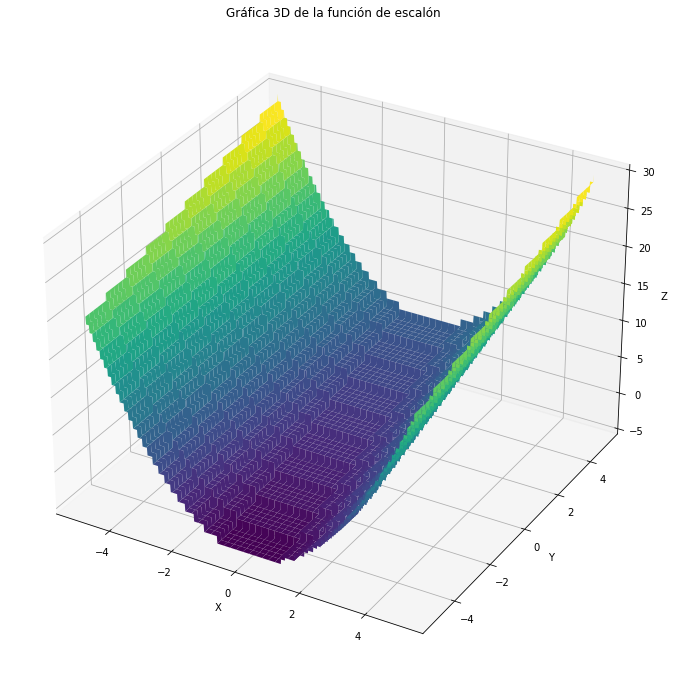

In [43]:
# Función de escalón
def step_function(x, y):
    return np.floor(x**2) + np.floor(y)

# Definición de la grilla
grid_size = 800
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
X, Y = np.meshgrid(x, y)
# Cálculo de la función de escalón
Z_floor = step_function(X, Y)

# Gráfica 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_floor, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfica 3D de la función de escalón')

plt.show()

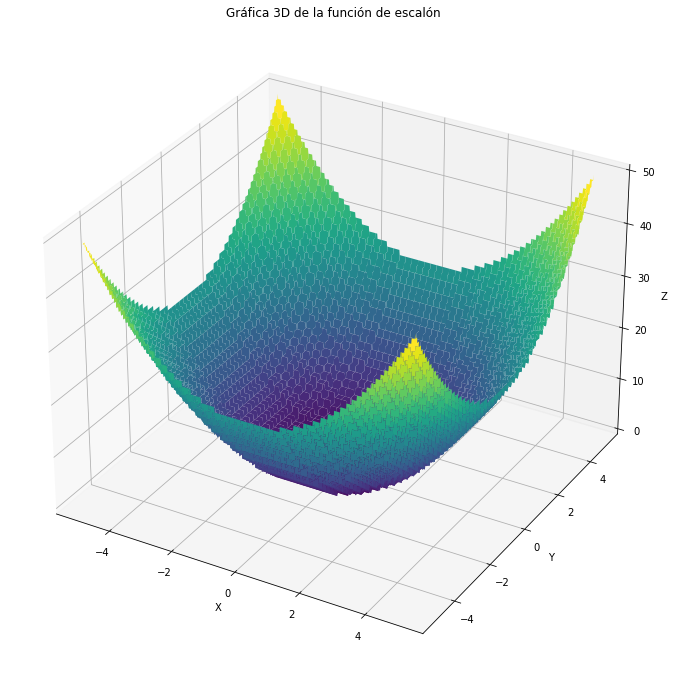

In [44]:
# Función de escalón
def step_function(x, y):
    return np.floor(x**2) + np.floor(y**2)

# Definición de la grilla
grid_size = 800
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
X, Y = np.meshgrid(x, y)
# Cálculo de la función de escalón
Z_floor = step_function(X, Y)

# Gráfica 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_floor, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfica 3D de la función de escalón')

plt.show()

# Weierstrass  Function

$$
f(x) = \sum_{n=0}^{\infty} a^n \cos(b^n \pi x) 
$$

Donde $0 < a < 1$ y $b$ es un enterp impar positivo tal que $ab > 1 + \frac{3}{2}\pi$. 

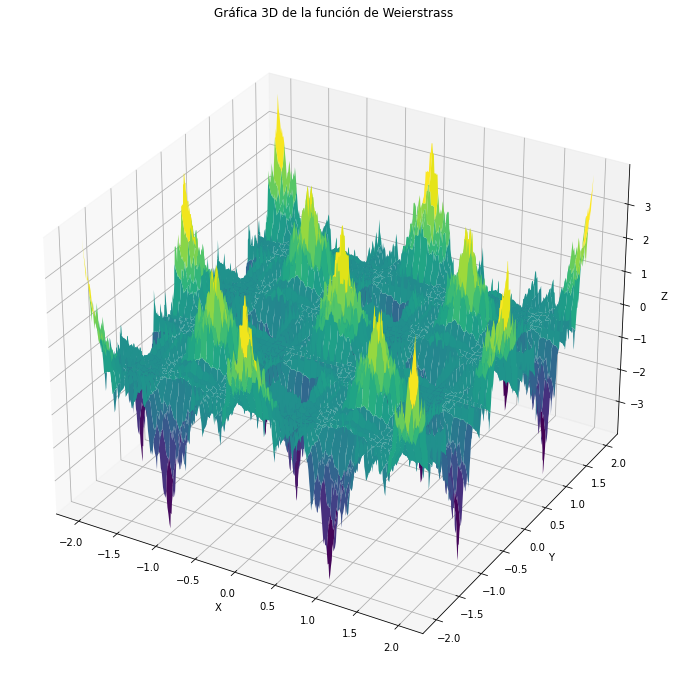

In [45]:
# Funcion de Weierstrass
def weierstrass_3d(x, y, a=0.5, b=3, n_terms=20):
    wx, wy = np.zeros_like(x), np.zeros_like(y)
    for k in range(n_terms):
        wx += a**k * np.cos(np.pi * b**k * x)
        wy += a**k * np.cos(np.pi * b**k * y)
    return wx * wy

# Definición de la grilla
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Cálculo de la función de Weierstrass
z = weierstrass_3d(x, y)

# Gráfica 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Gráfica 3D de la función de Weierstrass')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
